In [1]:
# General data and plotting
import json
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

# ML
# Preprocessing
from sklearn import preprocessing

# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# parameter tuning
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.cross_validation import train_test_split

ImportError: cannot import name 'MLPClassifier'

# Get Data

In [7]:
# Get Data and Format File
# set current working directory
WkDir = os.path.join(os.environ['HOME'], 'datascience/portfolio/charles/ds-interview-guidebook/')
os.chdir(WkDir)
os.getcwd() # getting just to confirm its the right directory

# get file
JsonFile = open('rideshare_user_history.json', 'r').read()  # reads text of file as string
JsonLoad = json.loads(JsonFile)  # converts string to parsed json

# read file head
JsonLoad[:5]

# convert list of dictionaries to pd.Dataframe
Df = pd.DataFrame(JsonLoad)
DfBackup = Df.copy()

In [10]:
print(JsonFile[0:10])# looking at first ten characters of string
print(JsonLoad[0:10]) # Load figures out where to separate the string json

[{"city": 
[{'trips_in_first_30_days': 4, 'last_trip_date': '2014-06-17', 'avg_rating_of_driver': 4.7, 'surge_pct': 15.4, 'phone': 'iPhone', 'avg_rating_by_driver': 5.0, 'avg_dist': 3.67, 'signup_date': '2014-01-25', 'weekday_pct': 46.2, 'avg_surge': 1.1, 'black_car_user': True, 'city': "King's Landing"}, {'trips_in_first_30_days': 0, 'last_trip_date': '2014-05-05', 'avg_rating_of_driver': 5.0, 'surge_pct': 0.0, 'phone': 'Android', 'avg_rating_by_driver': 5.0, 'avg_dist': 8.26, 'signup_date': '2014-01-29', 'weekday_pct': 50.0, 'avg_surge': 1.0, 'black_car_user': False, 'city': 'Astapor'}, {'trips_in_first_30_days': 3, 'last_trip_date': '2014-01-07', 'avg_rating_of_driver': 4.3, 'surge_pct': 0.0, 'phone': 'iPhone', 'avg_rating_by_driver': 5.0, 'avg_dist': 0.77, 'signup_date': '2014-01-06', 'weekday_pct': 100.0, 'avg_surge': 1.0, 'black_car_user': False, 'city': 'Astapor'}, {'trips_in_first_30_days': 9, 'last_trip_date': '2014-06-29', 'avg_rating_of_driver': 4.6, 'surge_pct': 20.0, 'phon

In [3]:
# !!! THIS SECTION IS AN FYI, DON'T RUN IT.  IT TAKES A LONG TIME!!!
# Flatten Dictionaries in Case Different Number of Keys
# in case file dictionaries have different sets of keys
JsonChklst = []
for blob in JsonLoad:
    for key in blob.keys():
        JsonChklst.append(key)
UnqKeys = set(JsonChklst)

# initialize df with UnqKeys for columns
# Df = pd.DataFrame(columns=UnqKeys)

# populate 3 rows as test
# for blob in JsonLoad[:2]:
#     LolNewVals = [blob.values()]
#     ListNewKeys = blob.keys()
#     DfNewRow = pd.DataFrame(data=LolNewVals, columns=ListNewKeys)
#     Df = Df.append(DfNewRow, ignore_index=True)

# # populate all rows
# for blob in JsonLoad:
#     LolNewVals = [blob.values()]
#     ListNewKeys = blob.keys()
#     DfNewRow = pd.DataFrame(data=LolNewVals, columns=ListNewKeys)
#     Df = Df.append(DfNewRow, ignore_index=True)

# Inspect and Clean Data

In [11]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
black_car_user            50000 non-null bool
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [12]:
# Inspect Table
# check size of frame: 12 cols, 21k rows
Df.shape

(50000, 12)

In [13]:
# check df head
Df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,black_car_user,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,weekday_pct
0,3.67,5.0,4.7,1.10,True,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,46.2
1,8.26,5.0,5.0,1.00,False,Astapor,2014-05-05,Android,2014-01-29,0.0,0,50.0
2,0.77,5.0,4.3,1.00,False,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,100.0
3,2.36,4.9,4.6,1.14,True,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,80.0
4,3.13,4.9,4.4,1.19,False,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,82.4


In [14]:
# check data types
Df.dtypes

avg_dist                  float64
avg_rating_by_driver      float64
avg_rating_of_driver      float64
avg_surge                 float64
black_car_user               bool
city                       object
last_trip_date             object
phone                      object
signup_date                object
surge_pct                 float64
trips_in_first_30_days      int64
weekday_pct               float64
dtype: object

## data types

In [15]:
Df = DfBackup.copy() # since this block involves a lot of re-writing fields, copying the original dataframe
                     # is a good idea so you don't have to scroll to the top to regenerate it

# dates
Df['last_trip_date'] = pd.to_datetime(Df['last_trip_date'])
Df['signup_date'] = pd.to_datetime(Df['signup_date'])

# create target variable (based on date field)
TimeCutoff = Df['last_trip_date'].max() - dt.timedelta(days=30) 
# Df['last_trip_date'].max() is the very last date any rider took. Proxy for being retained "today"
Df['churn'] = np.where(Df['last_trip_date'] < TimeCutoff, 1, 0) # 1 -> person left, 0 -> person stayed

# convert dates to numeric
date_diff = (Df['signup_date'] - Df['signup_date'].min()) # # of days from earliest signup date
Df['days_from_first_signup'] = date_diff.astype('timedelta64[D]').astype('float')

# categorical
Df['city'] = Df['city'].astype('category')
Df['phone'] = Df['phone'].astype('category')

# boolean
Df['black_car_user'] = np.where(Df['black_car_user'] == True, 1, 0) # converting trues to 1, falses to zero

# continuous (percents)
Df['weekday_pct'] = Df['weekday_pct'].astype('float')/100
Df['surge_pct'] = Df['surge_pct'].astype('float')/100
Df['trips_in_first_30_days'] = Df['trips_in_first_30_days'].astype(np.float)

In [16]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
black_car_user            50000 non-null int64
city                      50000 non-null category
last_trip_date            50000 non-null datetime64[ns]
phone                     49604 non-null category
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null float64
weekday_pct               50000 non-null float64
churn                     50000 non-null int64
days_from_first_signup    50000 non-null float64
dtypes: category(2), datetime64[ns](2), float64(8), int64(2)
memory usage: 4.7 MB


## nulls

In [19]:
# inspect nulls
Df.isnull().sum()  # total nulls
Df.isnull().sum()/len(Df)  # percent nulls

avg_dist                  0.00000
avg_rating_by_driver      0.00402
avg_rating_of_driver      0.16244
avg_surge                 0.00000
black_car_user            0.00000
city                      0.00000
last_trip_date            0.00000
phone                     0.00792
signup_date               0.00000
surge_pct                 0.00000
trips_in_first_30_days    0.00000
weekday_pct               0.00000
churn                     0.00000
days_from_first_signup    0.00000
dtype: float64

In [20]:
# split analysis with two dataframes, one with dropped values one with imputed
DfImp = Df.copy()  # create Df for imputing values
DfCmp = Df.dropna(axis=0)  # create Df for dropping rows

# look at df with complete entries
DfCmp.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,black_car_user,surge_pct,trips_in_first_30_days,weekday_pct,churn,days_from_first_signup
count,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000
mean,5.460046,4.776446,4.601720,1.073822,0.384099,0.088987,2.609675,0.612549,0.588973,15.467752
std,5.145174,0.404606,0.616104,0.198747,0.486387,0.183221,4.059336,0.348138,0.492026,8.738060
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,0.000000,0.375000,0.000000,8.000000
50%,3.780000,5.000000,4.900000,1.000000,0.000000,0.000000,1.000000,0.667000,1.000000,16.000000
75%,6.490000,5.000000,5.000000,1.070000,1.000000,0.111000,3.000000,1.000000,1.000000,23.000000
max,79.690000,5.000000,5.000000,8.000000,1.000000,1.000000,125.000000,1.000000,1.000000,30.000000


### avg_rating_of_driver

/Users/Cronin/anaconda/envs/py35/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


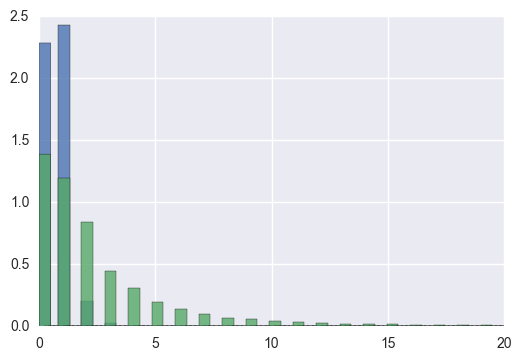

In [21]:
# look at cases where avg_rating_of_driver is null ==> 16% of cases so must attempt imputing
NullArod = DfImp['avg_rating_of_driver'].isnull()
DfImp[NullArod].describe()  # looks like all riders had 0 or 1 rides in first 30

# inspect difference in distributions for first 30 days
x_missing = DfImp[NullArod].trips_in_first_30_days
x_complete = DfCmp.trips_in_first_30_days

bins = np.linspace(0, 20, 100); nm=1; al=0.8; wid=0.5
plt.hist(x_missing, bins, normed=nm, alpha=al, width=wid)  # hist of first 30 day rides for missing rows
plt.hist(x_complete, bins, normed=nm, alpha=al, width=wid)  # hist of first 30 day rides for complete rows
plt.show()

# appears that these are fast churners--people who left within the first month after only 0 or
# 1 rides with the company, so they never returned to the app and submitted a rating

# impute to mean
ImpVal = DfImp['avg_rating_of_driver'].mean()
DfImp['avg_rating_of_driver'] = DfImp['avg_rating_of_driver'].fillna(ImpVal)

### phone

/Users/Cronin/anaconda/envs/py35/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


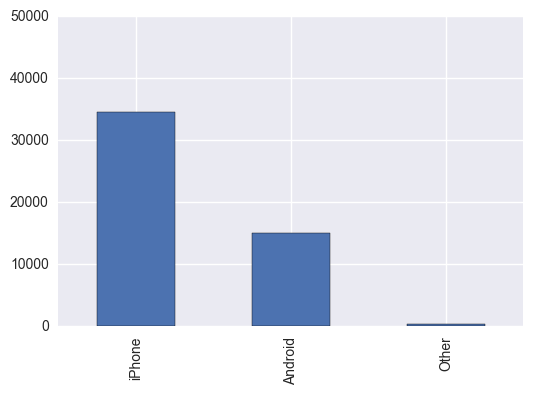

In [22]:
# look at cases where phone is null ==> drop or impute?
NullPhone = DfImp['phone'].isnull()
DfImp[NullPhone].describe()

# longer distance, higher rating by driver, more likely to be weekday trip, however
# all deviations within 1 standard deviation so for our purposes these look like normal rides
# with a non-iPhone, non-Android phone type, so let's call them "Other" and keep the data.

# impute to "Other" type
ImpVal = 'Other'  # value to impute with
Col = DfImp['phone'].cat.add_categories(ImpVal)  # create new category for categorical var
DfImp['phone'] = Col.fillna(ImpVal)  # fill with impute value
DfImp['phone'].value_counts().plot(kind='bar', ylim=(0,50000))

### avg_rating_by_driver

/Users/Cronin/anaconda/envs/py35/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


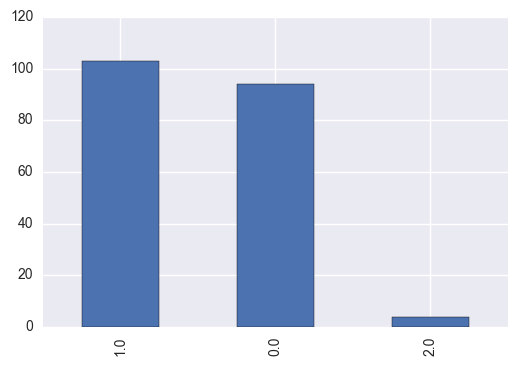

In [23]:
# look at cases where avg_rating_by_driver is null ==> drop or impute?
NullArbd = DfImp['avg_rating_by_driver'].isnull()
DfImp[NullArbd].describe()

# check average rides in first month
DfImp.loc[NullArbd, 'trips_in_first_30_days'].value_counts().plot(kind='bar')

# appears as with avg_rating_of_driver these are customers who churned after 1/2 rides
# it's reasonable to assume they're average quality drivers and impute the mean

# impute to mean
ImpVal = DfImp['avg_rating_by_driver'].mean()
DfImp['avg_rating_by_driver'] = DfImp['avg_rating_by_driver'].fillna(ImpVal)

In [24]:
# did we get rid of all the nulls?
DfImp.isnull().sum()

avg_dist                  0
avg_rating_by_driver      0
avg_rating_of_driver      0
avg_surge                 0
black_car_user            0
city                      0
last_trip_date            0
phone                     0
signup_date               0
surge_pct                 0
trips_in_first_30_days    0
weekday_pct               0
churn                     0
days_from_first_signup    0
dtype: int64

# Feature Inspection

## Continuous Features

In [25]:
# look at all continuous features
ColsCont = [
    'avg_dist',
    'avg_rating_by_driver',
    'avg_rating_of_driver',
    'avg_surge',
    'surge_pct',
    'trips_in_first_30_days',
    'weekday_pct',
    'days_from_first_signup'
    ]

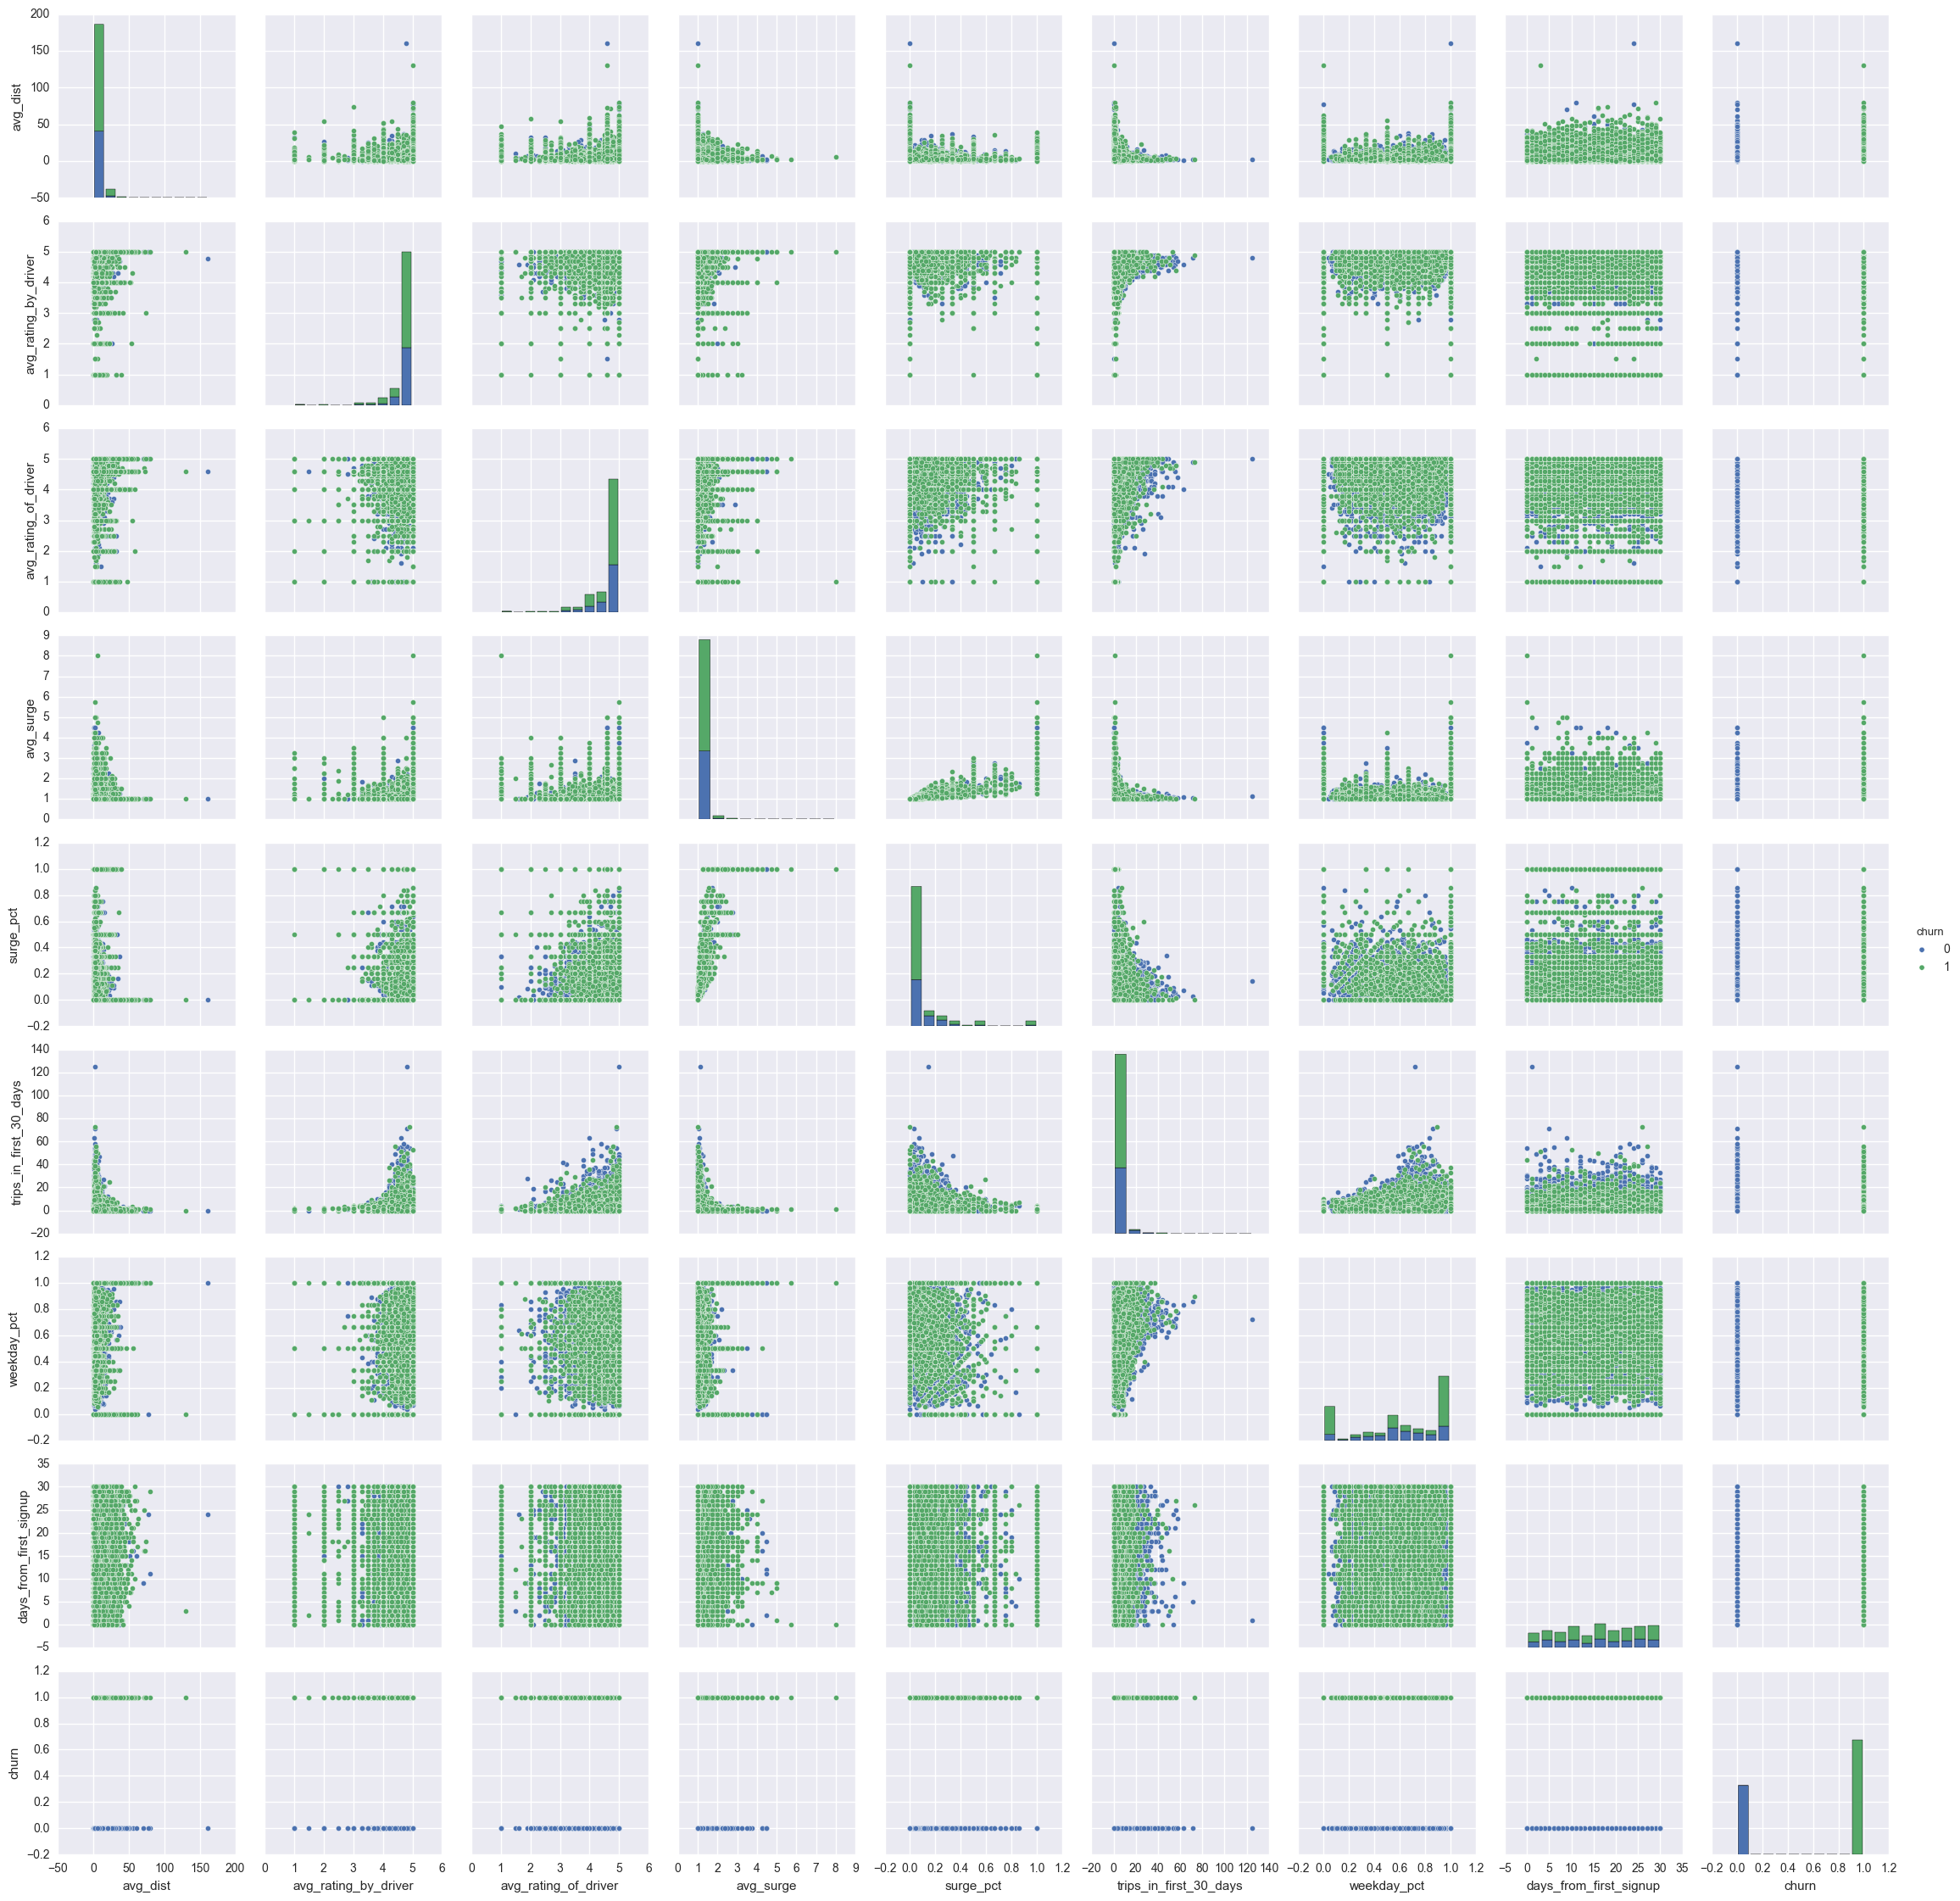

In [26]:
sns.pairplot(DfImp[ColsCont + ['churn']], hue='churn')

### log1p transform

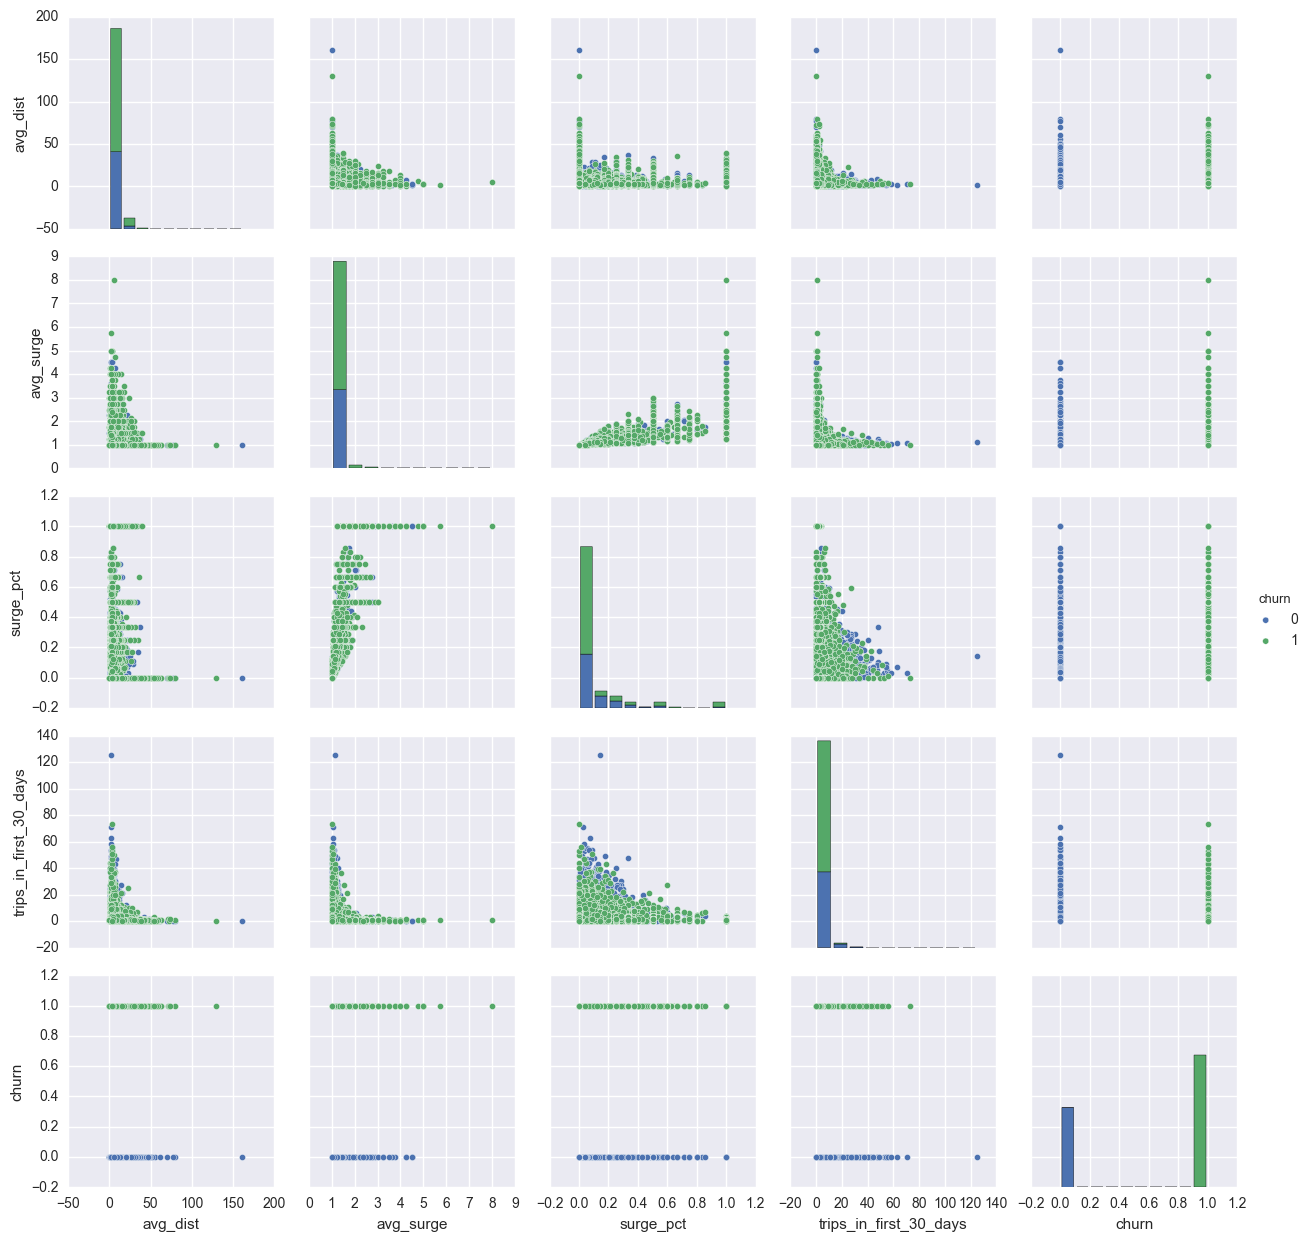

In [30]:
# Columns to show on log scale
ColsLog1p = [
    'avg_dist',
    'avg_surge',
    'surge_pct',
    'trips_in_first_30_days']

for c in ColsLog1p:
    NewField = c + '_log1p'
    DfImp[NewField] = np.log1p(DfImp[c])

NewColsLog1p = [c + '_log1p' for c in ColsLog1p]

sns.pairplot(DfImp[ColsLog1p + ['churn']], hue='churn')

### exp transform

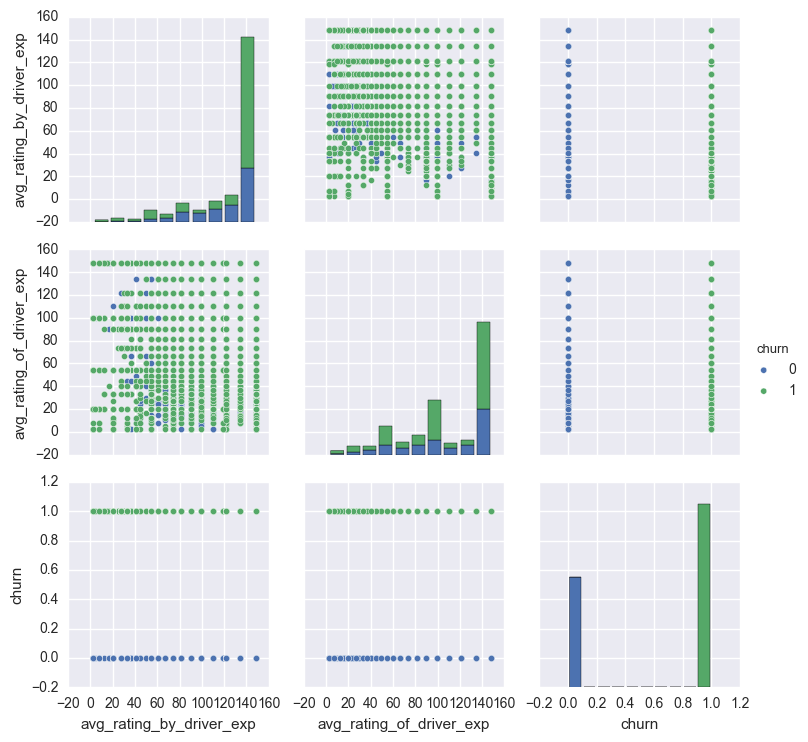

In [31]:
# Columns to Exp
ColsExp = [
    'avg_rating_by_driver',
    'avg_rating_of_driver']

for c in ColsExp:
    NewField = c + '_exp'
    DfImp[NewField] = np.exp(DfImp[c])

NewColsExp = [c + '_exp' for c in ColsExp]

sns.pairplot(DfImp[NewColsExp + ['churn']], hue='churn')

### Visualization of log1p and exp-transformed Fields

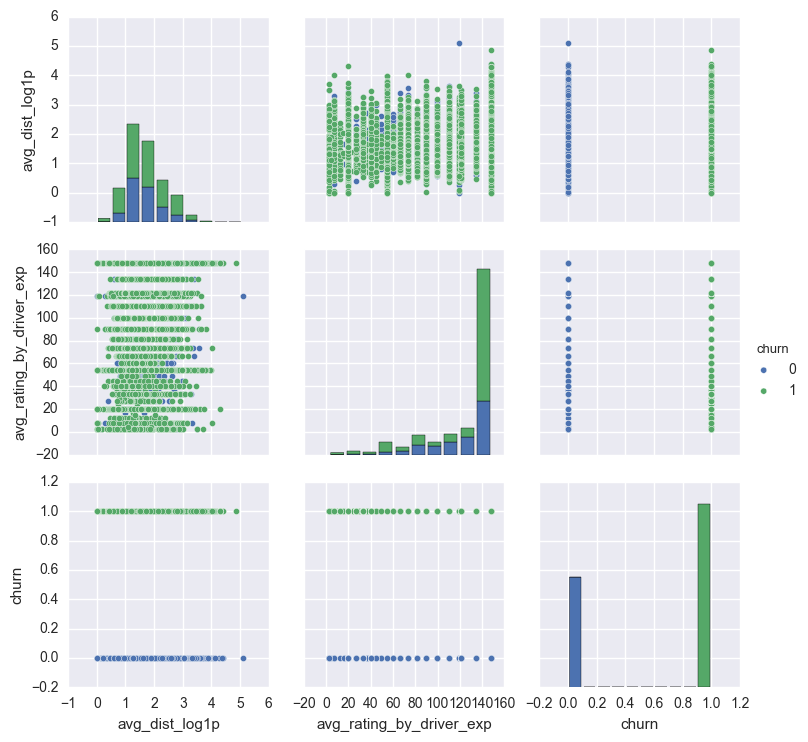

In [32]:
# visual comparison of transformation
ColsTest = [
    'avg_dist_log1p',
    'avg_rating_by_driver_exp']
sns.pairplot(DfImp[ColsTest + ['churn']], hue='churn')

In [33]:
# create df for transformed continuous features
TransCols = NewColsLog1p + NewColsExp
DropCols = ColsCont

# keep the original df and make another one for transformed cols
DfImpTrans = DfImp.drop(DropCols, axis=1).sort_index(axis=1)  # remove untransformed columns
DfImp = DfImp.drop(TransCols, axis=1).sort_index(axis=1)  # remove transformed columns

## Categorical Features

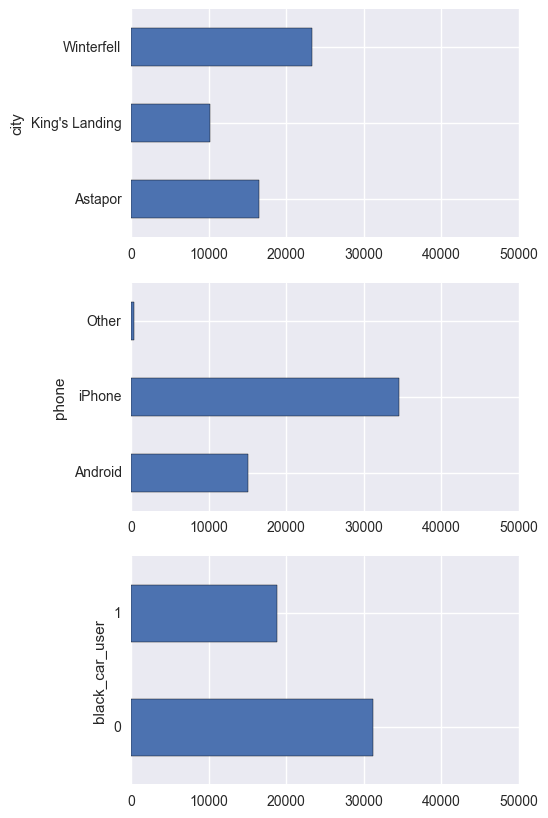

In [34]:
ColsNom = [
    'city',
    'phone',
    'black_car_user']

plt.figure(1)
plt.subplots(3, 1, figsize=(5, 10)); n=0
for Col in ColsNom:
    n+=1
    plt.subplot(3, 1, n)
    DfImpTrans.groupby(Col).size().plot(kind='barh', xlim=(0,50000))

## Date Features

In [ ]:
ColsDate = [
    'last_trip_date',
    'signup_date']

plt.figure(1)
for Col in ColsDate:
    DfImpTrans.groupby(Col).size().plot(kind='line')

# Feature Scaling and Preprocessing

In [12]:
# pick dataframe
Df = DfImp  # the one with imputed values

In [13]:
# isolate target
y = np.where(Df['churn'] == True, 1, 0)

# convert continuous variables to standard scalar
scaler = preprocessing.StandardScaler()
features_cont = Df.dtypes[Df.dtypes.values == 'float64'].index.tolist()
X_cont = Df[features_cont].as_matrix().astype(np.float)
X_cont = scaler.fit_transform(X_cont)

# dummify categoricals
onehot = pd.get_dummies(Df[['phone', 'city']])  # convert to binary
Df = pd.concat([Df, onehot], axis=1)  # append new fields to df

# drop unneeded fields
to_drop = ['signup_date','last_trip_date', 'phone', 'city', 'churn']
Df = Df.drop(to_drop, axis=1)

# extract boolean
features_bool = Df.dtypes[Df.dtypes.values != 'float64'].index.tolist()
X_bool = Df[features_bool].as_matrix().astype(np.float)

# aggregate features
features = features_cont + features_bool
X = np.hstack([X_cont, X_bool])

# create dataframe
DfScaled = pd.DataFrame(X, columns=features)
DfScaled['churn'] = y

In [14]:
# look at data ranges
DfScaled.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,days_from_first_signup,black_car_user,phone_Android,phone_iPhone,phone_Other,city_Astapor,city_King's Landing,city_Winterfell,churn
count,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,-2.142286e-17,-3.811351e-16,-5.599077e-17,2.766498e-16,2.629008e-17,1.335820e-17,2.138734e-16,4.590106e-17,0.37708,0.300440,0.691640,0.007920,0.330680,0.202600,0.466720,0.623920
std,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,0.48466,0.458454,0.461821,0.088642,0.470463,0.401941,0.498896,0.484405
min,-1.015686e+00,-8.475984e+00,-6.374769e+00,-3.362683e-01,-4.433944e-01,-6.006888e-01,-1.643048e+00,-1.775696e+00,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-5.916680e-01,-1.753414e-01,-1.797602e-01,-3.362683e-01,-4.433944e-01,-6.006888e-01,-7.450173e-01,-8.618421e-01,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-3.358553e-01,4.976836e-01,1.742403e-01,-3.362683e-01,-4.433944e-01,-3.370206e-01,1.557103e-01,5.201200e-02,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2.003002e-01,4.976836e-01,7.052411e-01,-1.113812e-01,-1.250267e-02,1.903157e-01,1.053741e+00,8.516343e-01,1.00000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,2.718679e+01,4.976836e-01,7.052411e-01,3.114793e+01,4.566974e+00,3.235783e+01,1.053741e+00,1.651257e+00,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Feature Selection

In [ ]:
# train/test split for feature selection
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Correlation

In [ ]:
# correlation matrix
DfHeatmap = DfScaled.corr()
DfHeatmap

# matrix as heatmap
plt.figure(figsize=(10,7))
plt.pcolor(DfHeatmap)
plt.yticks(np.arange(0.5, len(DfHeatmap.index), 1), DfHeatmap.index)
plt.xticks(np.arange(0.5, len(DfHeatmap.columns), 1), DfHeatmap.columns, rotation='vertical')
plt.show()

## L1 Regularization

In [ ]:
# train with l1/lasso
lr = LogisticRegression(penalty='l1', C=0.01)
lr.fit(X_train, y_train)

# plot weights
lr_coefficients = pd.Series(lr.coef_[0], index=features).sort_values(ascending=False)
plt.figure(1, figsize=(10, 5))
lr_coefficients.plot(kind='bar', ylim=(-2,2))

# accuracy
print('Training accuracy:', lr.score(X_train, y_train))
print('Test accuracy:', lr.score(X_test, y_test))

## Random Forest Feature Importance

In [ ]:
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
rf.fit(X_train, y_train)

rf_importances = rf.feature_importances_.tolist()
pd.Series(rf_importances, index=features).sort_values(ascending=False).plot(kind='bar')

print('Training accuracy:', rf.score(X_train, y_train))
print('Test accuracy:', rf.score(X_test, y_test))

## Recursive Features Elimination

In [ ]:
from sklearn.feature_selection import RFE

# with logistic regression

model = LogisticRegression(penalty='l1', C=100, n_jobs=-1)
# create the RFE model and select 3 attributes
rfe = RFE(model, n_features_to_select=6, step=1)
rfe = rfe.fit(X_train, y_train)

# summarize the selection of the attributes
pd.Series(rfe.ranking_.tolist(), index=features).sort_values().plot(kind='bar')

In [ ]:
# with random forest
model = RandomForestClassifier(n_estimators=100, n_jobs=-1)
# create the RFE model and select 3 attributes
rfe = RFE(model, n_features_to_select=6, step=1)
rfe = rfe.fit(X_train, y_train)

# summarize the selection of the attributes
pd.Series(rfe.ranking_.tolist(), index=features).sort_values().plot(kind='bar')

# Horse Race

## Run Models (without tuning)

In [15]:
from sklearn.model_selection import cross_val_predict

# create dict of models
models_dict = {
    'Neural Net':          MLPClassifier(activation='relu'),
    'Random Forest':       RandomForestClassifier(n_estimators=100),
    'KNN':                 KNeighborsClassifier(n_neighbors=11),
    'Logistic Regression': LogisticRegression(C=1000),
    'Naive Bayes':         GaussianNB(),
    }

In [17]:
# run models and get output
predictions_dict = {}
for model in models_dict:
    y_pred = cross_val_predict(models_dict[model], X=X, y=y, cv=10, n_jobs=-1)
    predictions_dict[model] = y_pred
    print model + ' metrics:\n---------------------------------'
    print 'Accuracy: {0}'.format(str(round(metrics.accuracy_score(y, y_pred), 3)))
    print 'AUC: {0}'.format(str(round(metrics.roc_auc_score(y, y_score=y_pred), 3)))
    print 'Classification Report:\n{0}\n\n'.format(metrics.classification_report(y, y_pred))

KNN metrics:
---------------------------------
Accuracy: 0.754
AUC: 0.727
Classification Report:
             precision    recall  f1-score   support

          0       0.69      0.62      0.65     18804
          1       0.78      0.84      0.81     31196

avg / total       0.75      0.75      0.75     50000



Logistic Regression metrics:
---------------------------------
Accuracy: 0.718
AUC: 0.674
Classification Report:
             precision    recall  f1-score   support

          0       0.67      0.49      0.57     18804
          1       0.74      0.85      0.79     31196

avg / total       0.71      0.72      0.71     50000



Naive Bayes metrics:
---------------------------------
Accuracy: 0.699
AUC: 0.701
Classification Report:
             precision    recall  f1-score   support

          0       0.58      0.71      0.64     18804
          1       0.80      0.69      0.74     31196

avg / total       0.72      0.70      0.70     50000



Random Forest metrics:
-----------

In [18]:
# lesson of the day: neural networks
y_pred_all = np.array([sum(values) for values in zip(*predictions_dict.values())], dtype=float)
y_pred_all_bin = np.where((y_pred_all/y_pred_all.max()) > 0.5, 1, 0)

model = 'Class Vote'; y_pred = y_pred_all_bin
print model + ' metrics:\n---------------------------------'
print 'Accuracy: {0}'.format(str(round(metrics.accuracy_score(y, y_pred), 3)))
print 'AUC: {0}'.format(str(round(metrics.roc_auc_score(y, y_score=y_pred), 3)))
print 'Classification Report:\n{0}\n\n'.format(metrics.classification_report(y, y_pred))

Class Vote metrics:
---------------------------------
Accuracy: 0.774
AUC: 0.748
Classification Report:
             precision    recall  f1-score   support

          0       0.72      0.64      0.68     18804
          1       0.80      0.85      0.82     31196

avg / total       0.77      0.77      0.77     50000



